In [ ]:
# Install necessary packages
!apt-get update
!apt-get install openbabel
!apt-get install -y autodock-vina
!pip install rdkit-pypi



Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,848 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,352 kB]
Fetched 3,537 kB in 5s (754 kB/s)
Reading package lists... Done


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

In [ ]:
# Replace these with your actual file names
file_names = ['Chain_A_Lead_Reinvent4.csv', 'Chain_B_Lead_Reinvent4.csv', 'Chain_A_phase_1.csv', 'Chain_B_phase_1.csv']
smiles_column = 'SMILES'  # Assuming the SMILES column has the same name in all files

# Initialize an empty DataFrame for the merged data
merged_data = pd.DataFrame()

for file_name in file_names:
    # Read the current file
    df = pd.read_csv(file_name, usecols=[smiles_column])

    # Add a new column to store the name of the source file
    df['Source'] = file_name

    # Append the current file's data to the merged DataFrame
    merged_data = pd.concat([merged_data, df], ignore_index=True)

# Check for duplicates based on the 'SMILES' column
# Keep the first occurrence and drop the rest
merged_data = merged_data.drop_duplicates(subset='SMILES', keep='first')

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('merged_files_no_duplicates.csv', index=False)


[08:33:12] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[08:33:12] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry


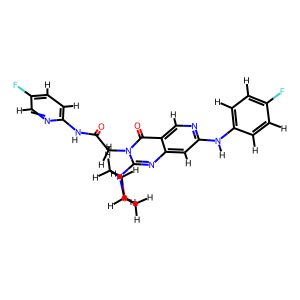

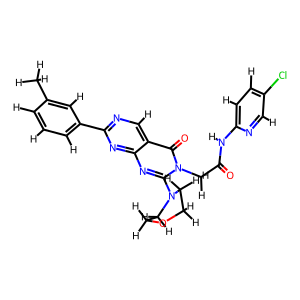

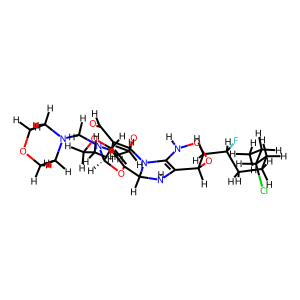

[08:33:15] UFFTYPER: Unrecognized atom type: S_5+4 (17)
[08:33:15] UFFTYPER: Unrecognized atom type: S_4+4 (21)
[08:33:19] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[08:33:19] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry


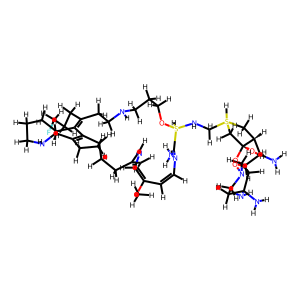

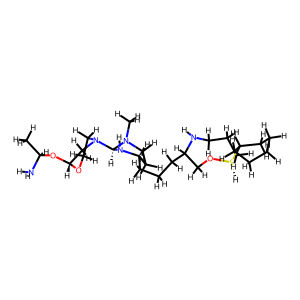

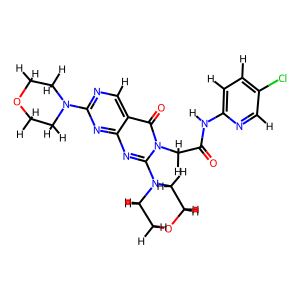

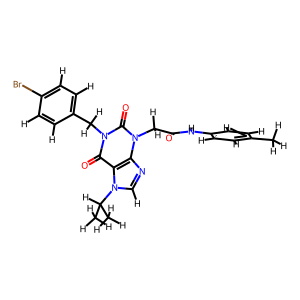

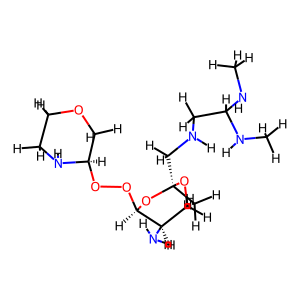

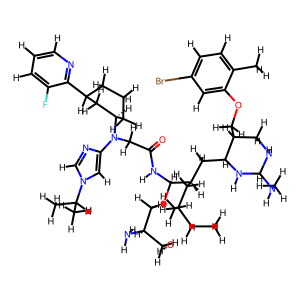

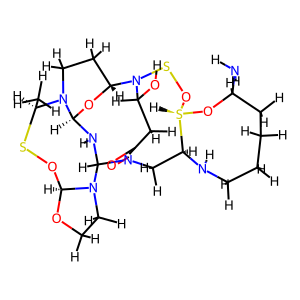

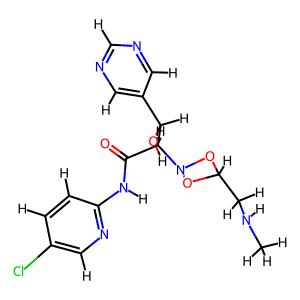

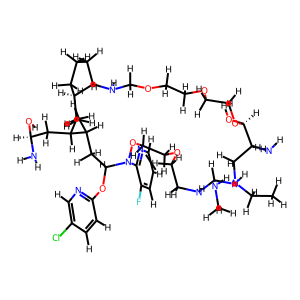

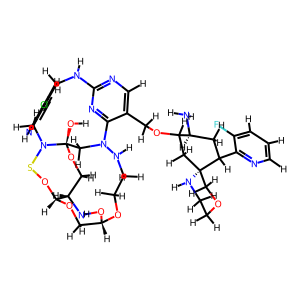

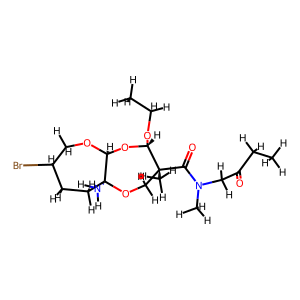

In [ ]:
# Read SMILES from a CSV file
df = pd.read_csv('merged_files_no_duplicates.csv')  # Replace 'your_file.csv' with your actual file name
smiles_list = df['SMILES'].tolist()  # Replace 'SMILES' with the actual column name if different

# Convert SMILES to RDKit Molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

num = 1
# Draw and display the 2D structures
for mol in molecules:
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
    AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters
    # Save to SDF file
    sdf_file = f"output{num}.sdf"
    num+=1
    w_sdf = Chem.SDWriter(sdf_file)
    w_sdf.write(mol)
    w_sdf.close()
    display(Draw.MolToImage(mol))



In [ ]:
#group the generated sdf files together, download, convert to pdbqt format, upload to drive
!zip -r /content/results.zip /content/ligands_sdf
#delet the folder
!rm -rf /content/ligands_sdf

	zip warning: name not matched: /content/ligands_sdf

zip error: Nothing to do! (try: zip -r /content/results.zip . -i /content/ligands_sdf)


In [ ]:
#Validate SMILES
def is_valid_smiles(smiles):
    """Check if a SMILES string is valid."""
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

# Replace 'merged_files_no_duplicates.csv' with your actual file name
df = pd.read_csv('merged_files_no_duplicates.csv')
smiles_list = df['SMILES'].tolist()

# Initialize an empty list for valid SMILES
valid_smiles = []

# Check each SMILES for validity and add to the list if valid
for smiles in smiles_list:
    if is_valid_smiles(smiles):
        valid_smiles.append(smiles)

# Print valid SMILES strings
if valid_smiles:
    print("Valid SMILES strings:")
    for smiles in valid_smiles:
        print(smiles)
    total_valid = len(valid_smiles)
    print(f"\nTotal number of valid SMILES strings: {total_valid}")
    #replace with the number of SMILES in your file
    if total_valid == 14:
        print("The file contains exactly 14 valid SMILES strings.")
    else:
        print("The file does not contain exactly 14 valid SMILES strings.")
else:
    print("No valid SMILES strings found.")


Valid SMILES strings:
[H]c1nc(N([H])C(=O)C([H])([H])N2C(=O)c3c([H])nc(N([H])c4c([H])c([H])c(F)c([H])c4[H])c([H])c3N=C2N2C([H])([H])C([H])([H])OC([H])([H])C2([H])[H])c([H])c([H])c1F
[H]c1nc(N([H])C(=O)C([H])([H])N2C(=O)c3c([H])nc(-c4c([H])c([H])c([H])c(C([H])([H])[H])c4[H])nc3N=C2N2C([H])([H])C([H])([H])OC([H])([H])C2([H])[H])c([H])c([H])c1Cl
[H]C(=O)C1=C(OC([H])([H])[H])N2C3=C(N([H])C2([H])C2=C1N(C([H])([H])N1C([H])([H])C([H])([H])OC([H])([H])C1([H])[H])[C@@]([H])(C([H])([H])OC([H])([H])C([H])([H])[H])O2)C([H])(C([H])([H])C([H])(F)C([H])([H])C([H])([H])C([H])([H])C([H])(Cl)C([H])([H])C([H])([H])[H])OON3[H]
[H]O[C@]12O[C@@]([H])(ON3C([H])([H])C([H])([H])C(N([H])[H])(N([H])[H])C([H])([H])C3([H])[H])[C@]([H])(N([H])[H])[C@@]1([H])C([H])([H])[S@TB12]([H])(C([H])([H])N([H])[S@SP1]1([H])OC([H])([H])C([H])([H])C([H])([H])N([H])C([H])([H])C([H])([H])/C(C([H])([H])C([H])([H])C([H])([H])F)=C3\C4=C(C([H])([H])C([H])([H])C4([H])C([H])([H])C([H])([H])C(=C([H])[H])/C([H])=N\C([H])=C(OC([H])([H])[H])

[08:33:44] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry
[08:33:44] WARNING: not removing hydrogen atom with neighbor that has non-tetrahedral stereochemistry


In [ ]:
#Mount google drive
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
ligands = '/content/drive/My Drive/ligands_pdbqt'  # Replace this with the path to your 'results' folder
os.chdir(ligands)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dock the ligands
num = 0
for file in os.listdir('.'):
  if file.endswith('.pdbqt'):
    if file == 'receptor.pdbqt':
        continue
    if file.endswith('.pdbqt'):
      print(file)
      # Construct the full path to your ligand file
      ligand_path = os.path.join(ligands, file)
      print(ligand_path)

      !vina --receptor receptor.pdbqt --ligand {file} --config config.txt --out output{num}.pdbqt
      num+=1

ligand1.pdbqt
/content/drive/My Drive/ligands_pdbqt/ligand1.pdbqt
AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                      